In [2]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib notebook

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az

## Model definition

In [3]:
with pm.Model() as model:
    mu = pm.Normal('$\mu$', 10, 5)
    sigma = pm.Gamma('$\sigma$', 1, .7)
    y = pm.Normal('$y$', mu, sigma, observed=[7])
  

In [6]:
mu

$\mu$

In [7]:
sigma

$\sigma$

In [8]:
y

$y$

## Sampling

In [9]:
with model:
    prior = pm.sample_prior_predictive(1000)
    trace = pm.sample(1000)
    post = pm.sample_posterior_predictive(trace)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$\sigma$, $\mu$]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5367.65draws/s]
There were 57 divergences after tuning. Increase `target_accept` or reparameterize.
There were 63 divergences after tuning. Increase `target_accept` or reparameterize.
There were 32 divergences after tuning. Increase `target_accept` or reparameterize.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
100%|██████████| 4000/4000 [00:01<00:00, 2273.89it/s]


In [10]:
import arviz as az

data = az.from_pymc3(trace=trace,
                     prior=prior,
                     posterior_predictive=post)
dataa = data
type(data)

arviz.data.inference_data.InferenceData

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb15cf0518>,
      dtype=object)

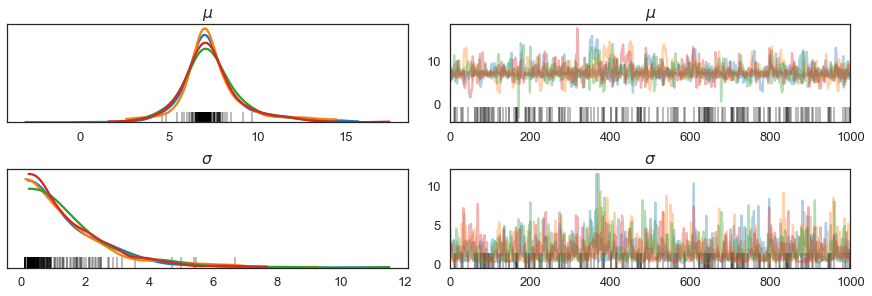

In [11]:
az.plot_trace(data)

In [12]:
data

Inference data with groups:
	> posterior
	> sample_stats
	> posterior_predictive
	> prior
	> observed_data

In [13]:
# !git pull
from gempy.bayesian import plot_posterior as pp

import seaborn as sns


<IPython.core.display.Javascript object>


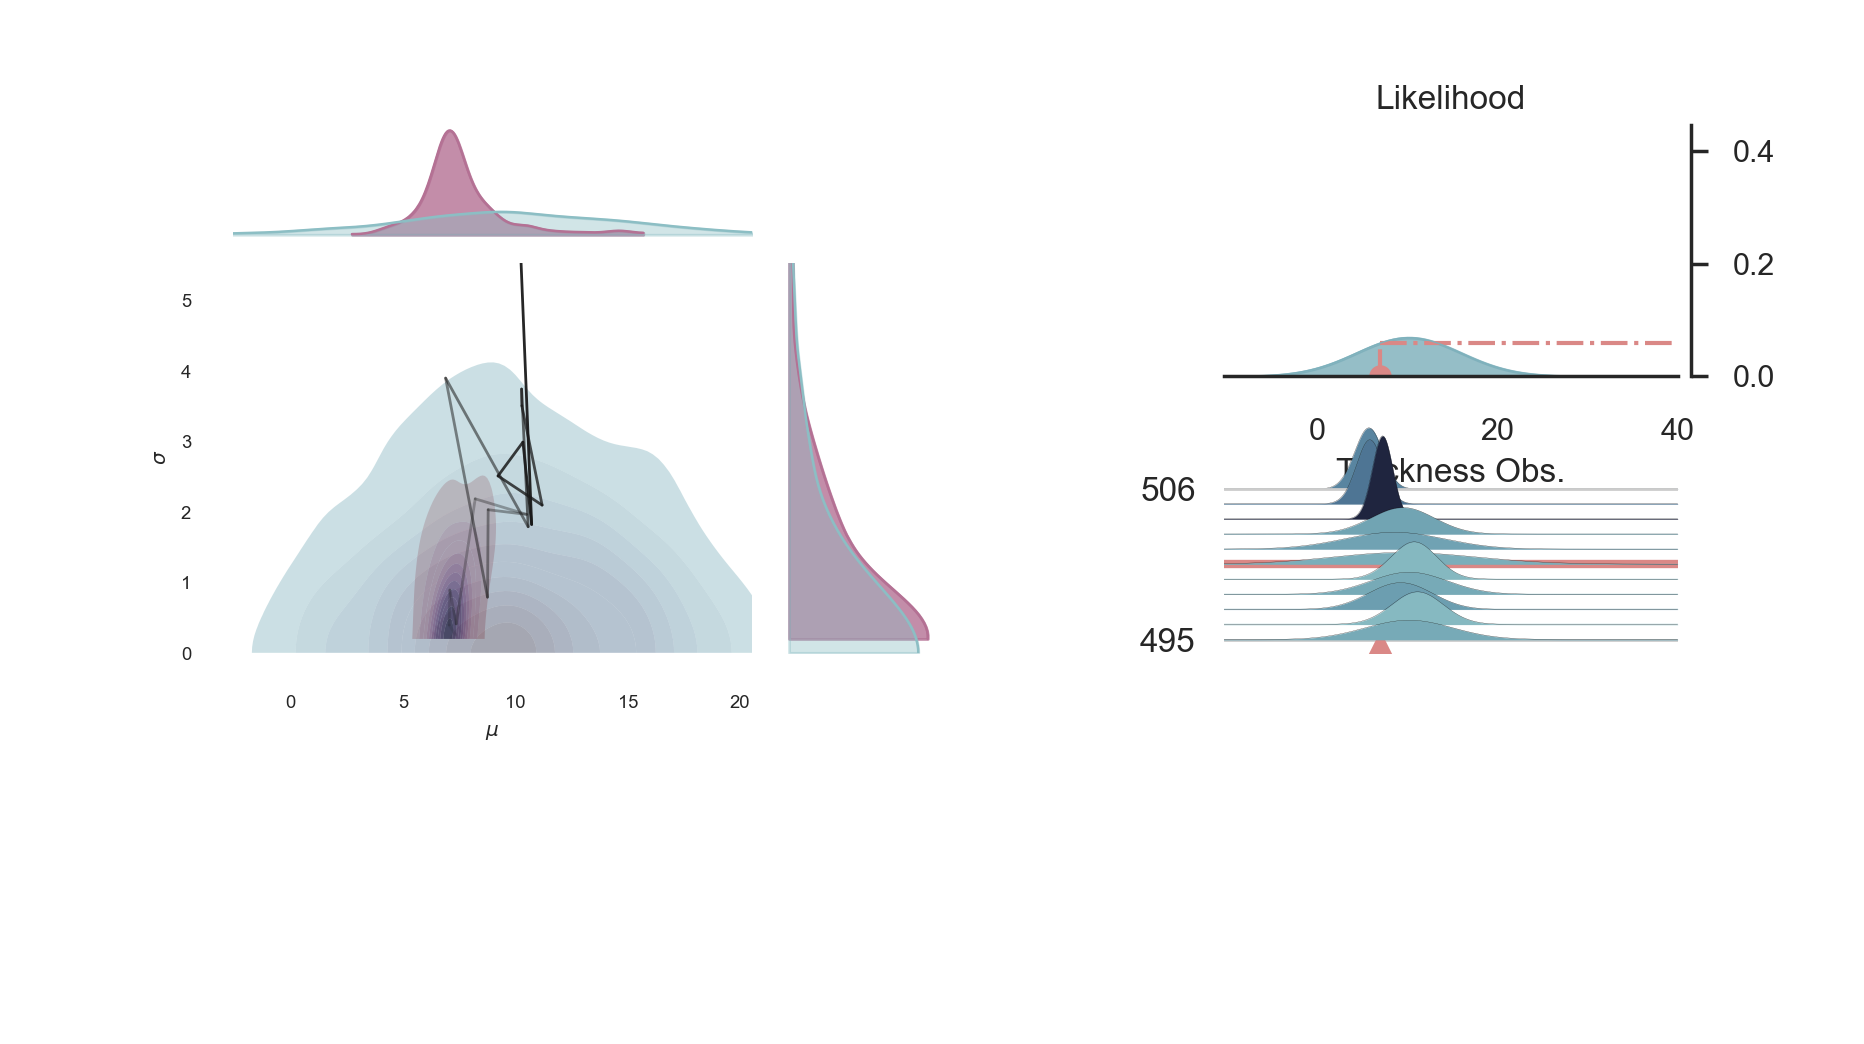

In [14]:
%matplotlib notebook
from importlib import reload
reload(pp)
p = pp.PlotPosterior(dataa)
p.create_figure(figsize=(9,3), joyplot=True)

In [15]:
def change_iteration(iteration):
    p.plot_posterior(['$\mu$', '$\sigma$'], ['$\mu$', '$\sigma$'], '$y$', iteration)

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(change_iteration, iteration=(0, 1000, 1))

interactive(children=(IntSlider(value=500, description='iteration', max=1000), Output()), _dom_classes=('widge…

<function __main__.change_iteration(iteration)>

In [17]:
from gempy.bayesian.plot_posterior import my_cmap_full

<IPython.core.display.Javascript object>


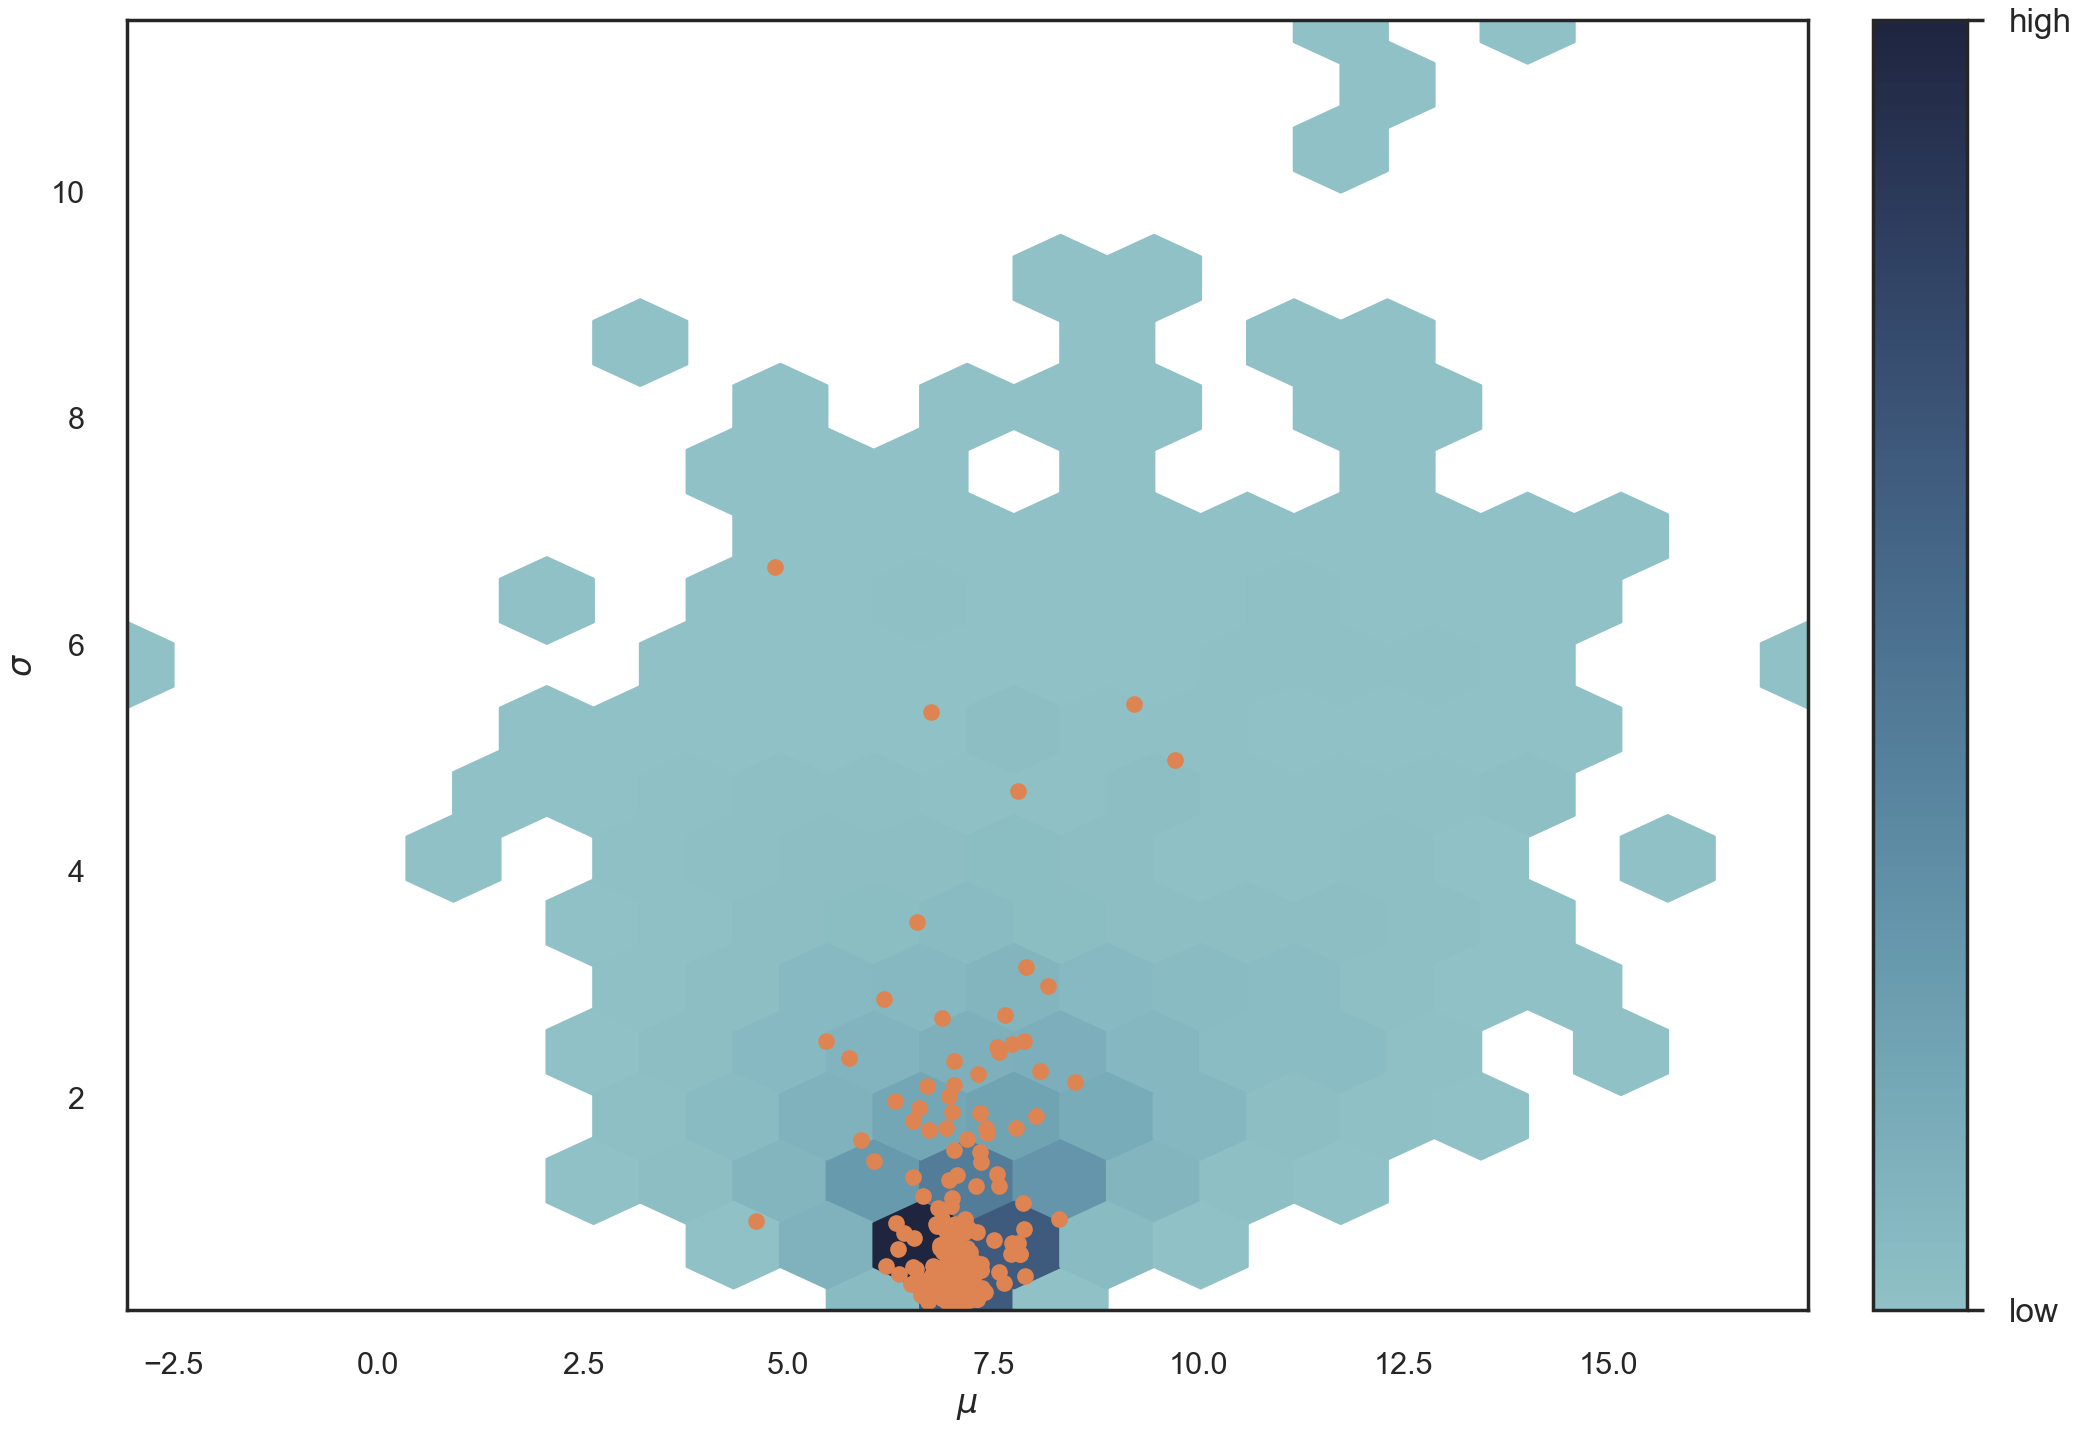

In [18]:
az.plot_pair(data, divergences=True, var_names=['$\mu$', '$\sigma$', '$y$'], kind='hexbin', contour=True,
            colorbar=True, plot_kwargs={'cmap':my_cmap_full});